# Supply Security Query

This notebook queries the Energy Islands corpus for statements related to energy supply security using multiple alternative formulations identified from the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
df = pd.read_csv('Actor statement corpus - dataset.csv')

# Set 'Year' column to int
df['Year'] = df['Year'].replace('', pd.NA)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(pd.Int64Dtype())

# Set 'X', 'Y' and 'Size' columns to float
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

print('Data loaded.')
print(f'Total statements in corpus: {len(df)}')

Data loaded.
Total statements in corpus: 6061


In [3]:
# Visualization function
def visualize(condition, title='Proportion of filtered items'):
  # Make a copy of df
  df_copy = df.copy()

  # Mark each row of df_copy as filtered if the condition is fulfilled
  df_copy['filtered'] = condition

  # Plot a pie chart with counts and percentages
  filtered_counts = df_copy['filtered'].value_counts()

  def make_autopct(values):
      def my_autopct(pct):
          total = sum(values)
          val = int(round(pct*total/100.0))
          return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
      return my_autopct

  # Define the colors for True and False
  colors = ['#4deded' if label else '#EAEAEA' for label in filtered_counts.index]

  # Create a figure with a small size
  plt.figure(figsize=(3, 3))

  plt.pie(filtered_counts, autopct=make_autopct(filtered_counts), colors=colors, startangle=90)
  plt.title(title)
  plt.show()
  
  # Print detailed statistics
  print(f"\nStatements matching the query: {filtered_counts.get(True, 0)}")
  print(f"Statements NOT matching the query: {filtered_counts.get(False, 0)}")
  print(f"Total statements: {len(df_copy)}")
  print(f"Percentage matching: {(filtered_counts.get(True, 0) / len(df_copy) * 100):.2f}%")

## Supply Security Query

This query searches for statements related to energy supply security using multiple alternative formulations identified from the corpus:

- supply security
- supply reliability
- security of supply
- power adequacy
- electricity supply security
- energy security
- energy independence
- stable electricity supply
- stable electricity
- stable energy
- forsyningssikkerhed (Danish term)

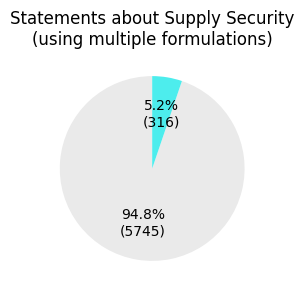


Statements matching the query: 316
Statements NOT matching the query: 5745
Total statements: 6061
Percentage matching: 5.21%


In [5]:
# Build the query using the pipe operator (|) for OR logic
# This searches for any of the alternative formulations of "energy supply security"
query_terms = (
    'supply security|'
    'supply reliability|'
    'security of supply|'
    'power adequacy|'
    'energy security|'
    'energy independence|'
    'stable electricity|'
    'stable energy'
)

condition = df['Statement'].str.contains(query_terms, case=False, na=False)

visualize(condition, "Statements about Supply Security\n(using multiple formulations)")

## View Sample Results

In [ ]:
# Get the filtered dataframe
df_filtered = df[condition].copy()

print(f"\nFirst 5 statements matching the supply security query:\n")
print("="*80)

for idx, row in df_filtered.head(5).iterrows():
    print(f"\nID: {row['id']}")
    print(f"Actor: {row['Actor']}")
    print(f"Year: {row['Year']}")
    print(f"Statement (first 200 chars): {row['Statement'][:200]}...")
    print("-"*80)

## Breakdown by Actor

In [ ]:
# Analyze who is talking about supply security
df_filtered = df[condition].copy()

print("\nTop 10 actors discussing supply security:")
print(df_filtered['Actor'].value_counts().head(10))